# Mount and Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

zip_path = '/content/drive/MyDrive/MV Project/Enhanced/yolo_enhanced.zip'
extract_path = '/content/'

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Model Configuration and Training

In [ ]:
#!pip install -q ultralytics

In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 57610, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 57610 (delta 102), reused 54 (delta 54), pack-reused 57467 (from 3)
Receiving objects: 100% (57610/57610), 31.95 MiB | 20.78 MiB/s, done.
Resolving deltas: 100% (42714/42714), done.
/content/ultralytics


In [ ]:
!pip install -e
from ultralytics import YOLO


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

-e option requires 1 argument
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!mkdir -p weights
# !wget -P  weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
# !wget -P  weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P  weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
# !wget -P  weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
# !wget -P  weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
# !wget -P  weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt

In [ ]:
# Load
model = YOLO("yolov10m.yaml").load("yolov10m.pt")

Transferred 799/799 items from pretrained weights


In [ ]:
# Train
model.train(
    data="/content/yolo_format_dataset/data.yaml",
    epochs=50,
    imgsz=640,
    device=0,
    patience=10,
    lr0=0.001,
    lrf=0.01,
    warmup_epochs=3,
    save=True,
    save_period=-1  # Save
)

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10m.yaml, data=/content/yolo_format_dataset/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=yolov10m.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 755k/755k [00:00<00:00, 17.3MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1     78720  ultralytics.nn.modules.block.SCDown          [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1    228672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 82.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2372.0±1025.6 MB/s, size: 332.9 KB)


train: Scanning /content/yolo_format_dataset/labels/train... 2032 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2032/2032 [00:00<00:00, 2479.62it/s]

train: New cache created: /content/yolo_format_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 596.7±210.1 MB/s, size: 381.9 KB)


val: Scanning /content/yolo_format_dataset/labels/validation... 107 images, 0 backgrounds, 0 corrupt: 100%|██████████| 107/107 [00:00<00:00, 1562.23it/s]

val: New cache created: /content/yolo_format_dataset/labels/validation.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.23G      3.573       4.05      2.234        135        640: 100%|██████████| 127/127 [01:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        107        540      0.279      0.399      0.295      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.35G      3.486      3.101      2.233        158        640: 100%|██████████| 127/127 [01:21<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        107        540      0.375      0.437       0.32      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.38G      3.506      3.054      2.227        152        640: 100%|██████████| 127/127 [01:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        107        540      0.375      0.555       0.34      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.36G      3.432      2.806      2.204        209        640: 100%|██████████| 127/127 [01:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        107        540       0.52      0.525      0.468      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.32G      3.354      2.733      2.162        138        640: 100%|██████████| 127/127 [01:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        107        540      0.397      0.611      0.443      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.39G      3.269      2.617      2.138        159        640: 100%|██████████| 127/127 [01:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        107        540      0.553      0.637      0.608      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.34G      3.171      2.488      2.117        162        640: 100%|██████████| 127/127 [01:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        107        540      0.699       0.65      0.678      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.35G      3.125      2.394       2.09        142        640: 100%|██████████| 127/127 [01:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        107        540      0.656      0.625      0.684      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.38G      3.065      2.291      2.067        153        640: 100%|██████████| 127/127 [01:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        107        540      0.646      0.592      0.668      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.34G      3.029      2.281      2.051        218        640: 100%|██████████| 127/127 [01:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        107        540       0.69      0.565      0.669      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.38G      2.995      2.221      2.067        154        640: 100%|██████████| 127/127 [01:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        107        540      0.686      0.631      0.662      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.37G      2.961       2.12      2.031        122        640: 100%|██████████| 127/127 [01:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all        107        540      0.643      0.704      0.713      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       8.3G      2.887      2.102      2.015        126        640: 100%|██████████| 127/127 [01:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        107        540      0.614      0.691      0.666      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.37G      2.907      2.094      2.008        159        640: 100%|██████████| 127/127 [01:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all        107        540       0.58      0.627      0.594      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.35G       2.86      2.044      1.998        137        640: 100%|██████████| 127/127 [01:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        107        540       0.66      0.679      0.691      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.38G      2.827      1.951      1.971        130        640: 100%|██████████| 127/127 [01:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]


                   all        107        540      0.742      0.692      0.767      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.33G      2.813      1.965      1.991        164        640: 100%|██████████| 127/127 [01:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        107        540      0.672      0.696      0.725      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.39G      2.809      1.941      1.983        122        640: 100%|██████████| 127/127 [01:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        107        540      0.599      0.699      0.679      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.35G       2.75      1.869      1.963        152        640: 100%|██████████| 127/127 [01:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        107        540      0.651       0.74      0.738      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.35G      2.734      1.881      1.963        137        640: 100%|██████████| 127/127 [01:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        107        540      0.703      0.726      0.769      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.34G      2.717      1.837      1.959        154        640: 100%|██████████| 127/127 [01:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        107        540      0.734      0.688      0.731      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.36G      2.741      1.877      1.959        212        640: 100%|██████████| 127/127 [01:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        107        540      0.641      0.784      0.731      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.35G      2.718      1.845      1.958        159        640: 100%|██████████| 127/127 [01:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]

                   all        107        540      0.734      0.736      0.795      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       8.4G      2.707      1.788      1.963        189        640: 100%|██████████| 127/127 [01:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        107        540      0.692       0.73      0.773       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.36G      2.664      1.821      1.941        155        640: 100%|██████████| 127/127 [01:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        107        540      0.707      0.774      0.775       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       8.4G      2.597      1.695      1.922        140        640: 100%|██████████| 127/127 [01:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        107        540       0.72      0.716       0.76      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.35G      2.613      1.699      1.916        102        640: 100%|██████████| 127/127 [01:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        107        540       0.74      0.708      0.769      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.41G      2.574      1.674      1.912        180        640: 100%|██████████| 127/127 [01:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        107        540      0.747      0.689       0.77      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.32G      2.591       1.67      1.914        143        640: 100%|██████████| 127/127 [01:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        107        540      0.716      0.738      0.787      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       8.4G      2.573       1.63      1.911        123        640: 100%|██████████| 127/127 [01:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        107        540       0.76      0.726       0.78      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.34G      2.565      1.619      1.896        118        640: 100%|██████████| 127/127 [01:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        107        540      0.709      0.736       0.77      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.34G      2.537      1.608      1.898        229        640: 100%|██████████| 127/127 [01:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        107        540      0.752      0.749      0.791      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.37G      2.507       1.58      1.902        149        640: 100%|██████████| 127/127 [01:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        107        540      0.678      0.783      0.782      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.34G      2.452      1.535      1.892        225        640: 100%|██████████| 127/127 [01:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        107        540      0.733      0.718      0.743      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.35G      2.475      1.511      1.872        160        640: 100%|██████████| 127/127 [01:20<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        107        540       0.72      0.733      0.747      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.35G      2.472      1.523      1.867        147        640: 100%|██████████| 127/127 [01:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        107        540      0.757      0.748      0.801      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.38G      2.427      1.477       1.86        145        640: 100%|██████████| 127/127 [01:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        107        540      0.823      0.707      0.794      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.37G      2.413      1.489      1.856        173        640: 100%|██████████| 127/127 [01:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        107        540      0.729      0.734      0.777      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.35G      2.357      1.434      1.858        116        640: 100%|██████████| 127/127 [01:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        107        540      0.788      0.735      0.787      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.35G      2.346      1.418       1.85        124        640: 100%|██████████| 127/127 [01:19<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        107        540       0.76       0.73      0.782      0.521


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.31G      2.287      1.402      1.866        113        640: 100%|██████████| 127/127 [01:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        107        540      0.755      0.729      0.786      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.35G      2.261      1.323      1.853         82        640: 100%|██████████| 127/127 [01:18<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        107        540      0.767        0.7      0.781      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.38G      2.256      1.286      1.855         82        640: 100%|██████████| 127/127 [01:18<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        107        540      0.724      0.809      0.811      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.35G      2.174      1.224      1.827         96        640: 100%|██████████| 127/127 [01:18<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        107        540      0.742      0.768      0.798      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.31G      2.192      1.238      1.833         86        640: 100%|██████████| 127/127 [01:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        107        540      0.793      0.752      0.804      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.34G      2.169      1.213      1.825         96        640: 100%|██████████| 127/127 [01:18<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        107        540      0.748      0.756       0.81      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.36G       2.13      1.227      1.821         91        640: 100%|██████████| 127/127 [01:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        107        540      0.753      0.771      0.803      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.35G      2.119      1.204       1.81         79        640: 100%|██████████| 127/127 [01:18<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        107        540      0.723      0.767      0.806      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       8.3G      2.067       1.14      1.807         81        640: 100%|██████████| 127/127 [01:18<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        107        540      0.747      0.766      0.813      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.35G      2.066      1.166      1.797         62        640: 100%|██████████| 127/127 [01:19<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        107        540      0.766      0.759       0.82      0.577



50 epochs completed in 1.151 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 33.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 33.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10m summary (fused): 136 layers, 15,314,326 parameters, 0 gradients, 58.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]


                   all        107        540      0.764      0.754      0.821      0.577
                  weed         55        326       0.71      0.787      0.782      0.543
                  crop         54        214      0.819      0.721       0.86      0.612
Speed: 0.2ms preprocess, 8.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b515c6780d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
# Test
metrics = model.val(split='test', data='/content/yolo_format_dataset/data.yaml')

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10m summary (fused): 136 layers, 15,314,326 parameters, 0 gradients, 58.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 43.1±23.5 MB/s, size: 313.9 KB)


val: Scanning /content/yolo_format_dataset/labels/test... 137 images, 0 backgrounds, 0 corrupt: 100%|██████████| 137/137 [00:00<00:00, 355.76it/s]

val: New cache created: /content/yolo_format_dataset/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.29it/s]


                   all        137        541      0.774      0.784      0.826      0.499
                  weed         59        364      0.647      0.799      0.759      0.446
                  crop         82        177      0.901      0.769      0.893      0.552
Speed: 1.8ms preprocess, 15.0ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
# Move to Google Drive
import shutil
weight_path = "runs/detect/train/weights/best.pt"
destination_path = "/content/drive/MyDrive/MV Project/Weights/Main"
shutil.move(weight_path, destination_path)

print(f"Weight moved to Google Drive: {destination_path}")

Weight moved to Google Drive: /content/drive/MyDrive/MV Project/Weights/Main


# Model Evaluation

In [ ]:
from ultralytics import YOLO
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pathlib import Path

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load
model = YOLO("/content/drive/MyDrive/MV Project/Weights/Main/best.pt")

# Run
results = model.val(
    data="/content/yolo_format_dataset/data.yaml",
    split="test",
    conf=0.25,       # Consistent thresholding
    save_json=True,  # Save predictions
    plots=True       # Save confusion matrix
)

Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10m summary (fused): 136 layers, 15,314,326 parameters, 0 gradients, 58.9 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 22.0MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2362.3±1255.1 MB/s, size: 422.2 KB)



val: Scanning /content/yolo_format_dataset/labels/test... 137 images, 0 backgrounds, 0 corrupt: 100%|██████████| 137/137 [00:00<00:00, 1455.19it/s]

val: New cache created: /content/yolo_format_dataset/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]


                   all        137        541      0.773      0.794      0.804      0.517
                  weed         59        364      0.645      0.808      0.739      0.467
                  crop         82        177      0.902       0.78      0.869      0.567
Speed: 3.1ms preprocess, 13.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Saving runs/detect/val/predictions.json...
Results saved to runs/detect/val


In [ ]:
# Class dictionary
names = results.names
print("\n Class mapping:", names)

# Overall metrics
print(f"\n Overall Metrics:")
print(f"Precision (mean): {results.box.mp:.4f}")
print(f"Recall (mean):    {results.box.mr:.4f}")
print(f"mAP@0.50:         {results.box.map50:.4f}")
print(f"mAP@0.50:0.95:    {results.box.map:.4f}")

# Per-class metrics
for i, class_name in names.items():
    p = results.box.p[i]
    r = results.box.r[i]
    f1 = 2 * p * r / (p + r + 1e-6)
    print(f"\n {class_name}:\n - Precision: {p:.3f}  Recall: {r:.3f}  F1 Score: {f1:.3f}")


 Class mapping: {0: 'weed', 1: 'crop'}

 Overall Metrics:
Precision (mean): 0.7733
Recall (mean):    0.7937
mAP@0.50:         0.8039
mAP@0.50:0.95:    0.5170

 weed:
 - Precision: 0.645  Recall: 0.808  F1 Score: 0.717

 crop:
 - Precision: 0.902  Recall: 0.780  F1 Score: 0.836


In [ ]:
import json
import numpy as np

# Load
with open('/content/runs/detect/val/predictions.json', 'r') as f:
    predictions = json.load(f)

# Prepare
all_scores = []
weed_scores = []   #
crop_scores = []

# Collect
for pred in predictions:
    score = pred['score']
    category = pred['category_id']

    all_scores.append(score)
    if category == 1:
        crop_scores.append(score)
    else:
        weed_scores.append(score)


# Calculate
average_all = np.mean(all_scores) if all_scores else 0
average_weed = np.mean(weed_scores) if weed_scores else 0
average_crop = np.mean(crop_scores) if crop_scores else 0


# Print
print(f"Average Score (All classes) : {average_all:.4f}")
print(f"Average Score (Weed, class 0): {average_weed:.4f}")
print(f"Average Score (Crop, class 1): {average_crop:.4f}")


Average Score (All classes) : 0.7153
Average Score (Weed, class 0): 0.7943
Average Score (Crop, class 1): 0.6888


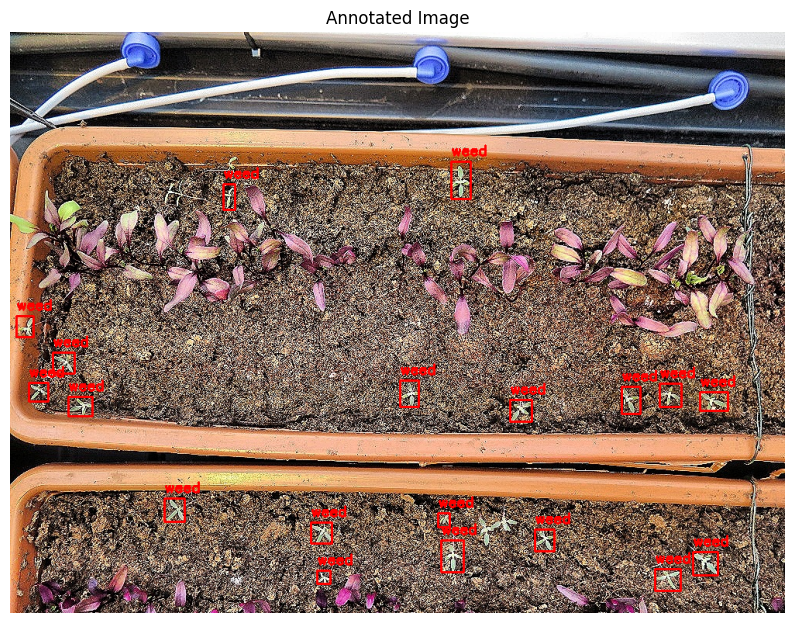

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Configure
image_path = "/content/yolo_format_dataset/images/test/IMG_6067.JPG"
label_path = "/content/yolo_format_dataset/labels/test/IMG_6067.txt"  # <-- Update this
output_dir = "/content/"

# Class
class_names = ["weed", "crop"]

# Load
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")
h, w, _ = image.shape

# Read
with open(label_path, 'r') as f:
    for line in f:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)

        label = class_names[int(class_id)]
        color = (0, 0, 255) if int(class_id) == 0 else (0, 255, 0)

        # Draw
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, label, (x1, y1 - 8), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# Convert
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Annotated Image")
plt.show()



image 1/1 /content/yolo_format_dataset/images/test/IMG_6067.JPG: 480x640 20 weeds, 56.8ms
Speed: 2.8ms preprocess, 56.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


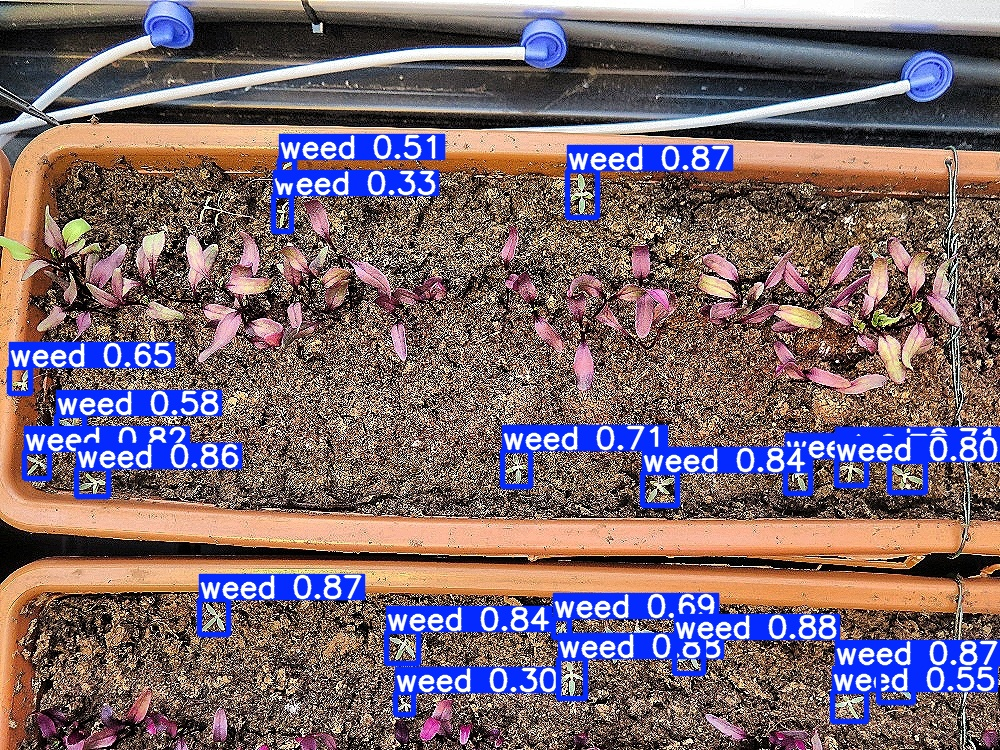

In [ ]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

# Load
# model = YOLO("/content/drive/MyDrive/MV Project/Weights/Main/best.pt")

# Path
image_path = "/content/yolo_format_dataset/images/test/IMG_6067.JPG"  # Replace with your image path

# Inference
results = model.predict(source=image_path, conf=0.25, save=True)

# Open
output_path = "/content/runs/detect/predict/IMG_6067.jpg"
img = Image.open(output_path)

# Display
display(img)